In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/forestfires_cleaned.csv')
df.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
df_cor = df.copy()

In [ ]:
for cols in df_cor.columns:
    if df_cor[cols].dtype == 'int64' or cols == 'area':
        df_cor = df_cor.drop(columns=[cols])
        

In [22]:
df_cor = df_cor.corr()

In [69]:
df_cor

,FFMC,DMC,DC,ISI,temp,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.227116,0.069491
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.061119,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

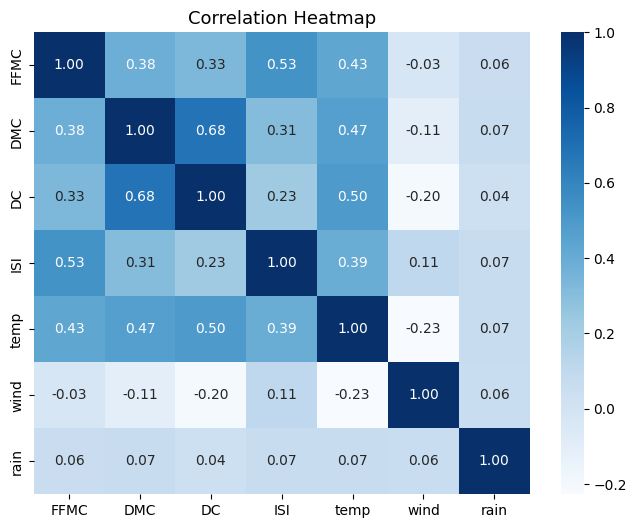

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap= 'Blues', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=13)

Dựa trên Correlation Heatmap, ta thấy có 2 feature với cor cao nhất là DC và DMC. Ta sẽ loại bỏ feature DMC vì DMC có độ tương quan lớn với các feature khác lớn hơn DC

In [70]:
X_y = df.drop(columns = ['DMC']).to_numpy()

In [71]:
X_y.shape

(517, 13)

In [73]:
class LinearRegression:
    def fit(self , X : np.ndarray, Y : np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        #self.theta_ : np.ndarray = np.matmul(int_cov, np.matmul(X.T,Y))
        self.theta_ : np.ndarray = inv_cov @ (X.T @ Y)
    
    def rmse(self, y : np.ndarray , y_hat : np.ndarray) -> float:
        delta = y - y_hat
        return (delta**2).mean()**0.5
    
    def predict (self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

In [74]:
N = df.shape[0]
X_y_train , X_y_test = np.split (X_y, indices_or_sections=[int (0.8 * N)])

In [75]:
X_train = X_y_train[ : , :-1]
y_train = X_y_train[ : , -1]

X_test = X_y_test[ : , :-1]
y_test = X_y_test[ : , -1]

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_predict = lr.predict(X_test)

In [77]:
print(f'{lr.rmse(y_test, Y_predict):.20f}')

79.33760145008217534723
